In [1]:
import os
from util_bdt import *

In [2]:
data = pd.read_csv('data/run_30413/run_30413_labelled_tails.csv')
data.head()

,#Ch.#,t,E(t),A_0,E(A_0),t_p,E(t_p),k3,E(k3),k4,E(k4),k5,E(k5),k6,E(k6),Chi2/DOF,integral_R,max_deviation,class
0,1,5.014668,0.008637,88813.00258,1574.470,2.185990,0.010328,0.958992,0.017475,1.248665,0.024367,0.065162,3.971222e-03,0.066870,4.085170e-03,11.788794,-310.660036,-25.730102,c1
1,5,5.027961,0.008432,89118.75734,298.836,2.163617,0.009578,0.990102,0.015362,1.285738,0.022480,0.027013,1.080916e-02,0.027301,1.087349e-02,9.229203,-137.513352,-9.011581,c1
2,6,5.025032,0.008807,89401.56098,1577.360,2.252891,0.010268,0.967520,0.016561,1.246196,0.023000,0.029420,3.432170e-03,0.030555,3.514271e-03,7.523369,-512.475697,-24.754859,c1
3,9,5.015114,0.008383,88852.85358,4856.830,2.179301,0.009825,0.951252,0.013167,1.242426,0.020734,-0.178756,4.449393e-07,-0.178756,4.455861e-07,8.138368,-6.032877,-5.766407,c1
4,11,5.040750,0.008590,88556.38748,571.131,2.184355,0.010283,1.020078,0.021741,1.307345,0.028292,0.022602,1.684398e-03,0.025840,1.807494e-03,4.509772,-1595.153796,-55.495744,c1


In [3]:
encoded_df = one_hot_encode_sklearn(data=data, column_name='class')

[[1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 ...
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]]
['class_c1' 'class_c2' 'class_c3' 'class_c4']


In [4]:
cols_output_classifier = ['class_c1', 'class_c2', 'class_c3', 'class_c4']
cols_input = ['A_0', 't_p', 'k3', 'k4', 'k5', 'k6']

cols_output = cols_output_classifier + ['integral_R', 'max_deviation']
cols_output_regressor = ['integral_R', 'max_deviation']

In [5]:
splitted_data = train_valid_test(original_df=encoded_df, cols_input=cols_input, cols_output=cols_output, cols_output_classifier=cols_output_classifier, cols_output_regressor=cols_output_regressor)

In [6]:
# Parameter grid for regression
param_grid = {
    'max_depth': [3, 4],
    'learning_rate': [0.1, 0.05],
    'n_estimators': [50, 100, 200],
    'min_child_weight': [1, 3, 5],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0],
    'objective': ['reg:squarederror'],  # for regression
    'tree_method': ['gpu_hist']
}

best_params_regressor = gridSearch_Regressor(train_data_dict=splitted_data['regressor'], param_grid=param_grid)

Fitting 3 folds for each of 324 candidates, totalling 972 fits


/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [16:29:44] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [16:29:44] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [16:29:44] WARNING: /home/conda/feedstock_root/build_artifacts/xgbo

[0]	validation_0-rmse:862.39111
[1]	validation_0-rmse:838.57465
[2]	validation_0-rmse:801.84568
[3]	validation_0-rmse:777.53703
[4]	validation_0-rmse:756.61407
[5]	validation_0-rmse:734.24333
[6]	validation_0-rmse:710.09948
[7]	validation_0-rmse:690.08508
[8]	validation_0-rmse:670.69268
[9]	validation_0-rmse:653.32107
[10]	validation_0-rmse:637.83287
[11]	validation_0-rmse:631.93327
[12]	validation_0-rmse:618.77413
[13]	validation_0-rmse:613.21777
[14]	validation_0-rmse:600.07573
[15]	validation_0-rmse:592.03824
[16]	validation_0-rmse:584.31752
[17]	validation_0-rmse:572.24606
[18]	validation_0-rmse:565.69919
[19]	validation_0-rmse:560.72942
[20]	validation_0-rmse:555.81814
[21]	validation_0-rmse:550.13154
[22]	validation_0-rmse:540.91289
[23]	validation_0-rmse:538.25174
[24]	validation_0-rmse:533.97280
[25]	validation_0-rmse:526.28238
[26]	validation_0-rmse:519.06680
[27]	validation_0-rmse:511.98084
[28]	validation_0-rmse:506.20713
[0]	validation_0-rmse:864.00212
[29]	validation_0-rms

/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [16:29:44] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [16:29:44] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [16:29:44] WARNING: /home/conda/feedstock_root/build_artifacts/xgbo

[2]	validation_0-rmse:804.37388
[31]	validation_0-rmse:495.25604
[2]	validation_0-rmse:803.47619
[3]	validation_0-rmse:781.68765
[32]	validation_0-rmse:492.69651
[3]	validation_0-rmse:779.41252
[4]	validation_0-rmse:758.98134
[0]	validation_0-rmse:862.63621
[33]	validation_0-rmse:490.50670
[4]	validation_0-rmse:756.18147
[5]	validation_0-rmse:738.52195
[1]	validation_0-rmse:840.75794
[34]	validation_0-rmse:488.46056
[5]	validation_0-rmse:736.23281
[6]	validation_0-rmse:712.86907
[2]	validation_0-rmse:802.38471
[35]	validation_0-rmse:482.85516
[0]	validation_0-rmse:862.39111
[6]	validation_0-rmse:711.00384
[0]	validation_0-rmse:862.43697
[3]	validation_0-rmse:775.71271
[36]	validation_0-rmse:480.47222
[7]	validation_0-rmse:690.51913
[7]	validation_0-rmse:691.69542
[1]	validation_0-rmse:840.26826


/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [16:29:45] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [16:29:45] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


[0]	validation_0-rmse:863.83219
[8]	validation_0-rmse:670.39849
[37]	validation_0-rmse:477.87736
[8]	validation_0-rmse:671.15601
[2]	validation_0-rmse:802.28850
[1]	validation_0-rmse:838.57465
[4]	validation_0-rmse:755.38132
[0]	validation_0-rmse:864.00212
[9]	validation_0-rmse:653.41553
[1]	validation_0-rmse:840.62791
[0]	validation_0-rmse:863.06635
[9]	validation_0-rmse:654.01269
[3]	validation_0-rmse:779.41108
[0]	validation_0-rmse:863.83219
[38]	validation_0-rmse:476.50718
[1]	validation_0-rmse:843.58950
[0]	validation_0-rmse:862.63621
[0]	validation_0-rmse:863.25944
[10]	validation_0-rmse:638.49320
[0]	validation_0-rmse:863.79659
[10]	validation_0-rmse:638.73449
[2]	validation_0-rmse:801.84568[5]	validation_0-rmse:733.78290
[0]	validation_0-rmse:862.19591
[4]	validation_0-rmse:754.92329

[1]	validation_0-rmse:840.62791
[2]	validation_0-rmse:801.54181
[2]	validation_0-rmse:804.37388[1]	validation_0-rmse:840.75794

[39]	validation_0-rmse:475.48489
[1]	validation_0-rmse:841.68203
[1]

/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [16:29:46] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [16:29:46] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:58: Falling back to prediction using DMatrix due to mismatched devices. This might lead to higher memory usage and slower performance. XGBoost is running on: cuda:0, while the input data is on: cpu.
Potential solutions:
- Use a data structure that matches the device ordinal in the booster.
- Set the device for booster before call to inplace_predict.

This warning w

[13]	validation_0-rmse:617.53351
[14]	validation_0-rmse:603.42568
[19]	validation_0-rmse:564.46781
[14]	validation_0-rmse:600.26937
[11]	validation_0-rmse:632.16408
[13]	validation_0-rmse:617.80662
[15]	validation_0-rmse:592.03824
[15]	validation_0-rmse:592.52951
[14]	validation_0-rmse:603.23681
[12]	validation_0-rmse:620.24494
[23]	validation_0-rmse:540.37534
[11]	validation_0-rmse:634.20222
[18]	validation_0-rmse:565.88545
[12]	validation_0-rmse:619.64233
[14]	validation_0-rmse:605.08659
[15]	validation_0-rmse:596.49774
[12]	validation_0-rmse:621.73626
[20]	validation_0-rmse:559.72856
[15]	validation_0-rmse:591.74097
[12]	validation_0-rmse:620.24494
[14]	validation_0-rmse:602.74441
[16]	validation_0-rmse:584.31752
[16]	validation_0-rmse:584.38493
[15]	validation_0-rmse:592.26157
[13]	validation_0-rmse:615.07862
[12]	validation_0-rmse:621.73626
[24]	validation_0-rmse:535.85943
[19]	validation_0-rmse:561.27093
[13]	validation_0-rmse:614.38989
[15]	validation_0-rmse:594.72600
[16]	valid

/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [16:29:48] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [16:29:48] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:58: Falling back to prediction using DMatrix due to mismatched devices. This might lead to higher memory usage and slower performance. XGBoost is running on: cuda:0, while the input data is on: cpu.
Potential solutions:
- Use a data structure that matches the device ordinal in the booster.
- Set the device for booster before call to inplace_predict.

This warning w

[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=50, objective=reg:squarederror, subsample=0.8, tree_method=gpu_hist; total time=   4.3s
[43]	validation_0-rmse:463.58005
[40]	validation_0-rmse:474.17572
[43]	validation_0-rmse:470.36740
[42]	validation_0-rmse:475.02712
[46]	validation_0-rmse:465.62009
[42]	validation_0-rmse:468.72858
[40]	validation_0-rmse:478.20455
[38]	validation_0-rmse:480.21652
[43]	validation_0-rmse:469.79157
[27]	validation_0-rmse:513.19100
[45]	validation_0-rmse:465.83767
[41]	validation_0-rmse:477.06510
[44]	validation_0-rmse:471.35448
[40]	validation_0-rmse:480.61659
[44]	validation_0-rmse:462.08154
[47]	validation_0-rmse:458.53831
[44]	validation_0-rmse:469.01242
[41]	validation_0-rmse:471.05888
[43]	validation_0-rmse:473.49044
[47]	validation_0-rmse:464.11771
[43]	validation_0-rmse:467.61451
[41]	validation_0-rmse:477.06510
[39]	validation_0-rmse:478.24374
[44]	validation_0-rmse:468.44593
[28]	validation_0-rmse:5

/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [16:29:48] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [16:29:48] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:58: Falling back to prediction using DMatrix due to mismatched devices. This might lead to higher memory usage and slower performance. XGBoost is running on: cuda:0, while the input data is on: cpu.
Potential solutions:
- Use a data structure that matches the device ordinal in the booster.
- Set the device for booster before call to inplace_predict.

This warning w

[47]	validation_0-rmse:462.06598
[45]	validation_0-rmse:467.65565
[48]	validation_0-rmse:460.10212[32]	validation_0-rmse:493.47867

[49]	validation_0-rmse:460.95941
[45]	validation_0-rmse:471.56695
[46]	validation_0-rmse:466.07756
[3]	validation_0-rmse:779.41108
[49]	validation_0-rmse:455.75066
[49]	validation_0-rmse:458.12156
[43]	validation_0-rmse:467.61451
[48]	validation_0-rmse:467.19338
[0]	validation_0-rmse:864.00212
[46]	validation_0-rmse:458.97410
[48]	validation_0-rmse:457.12593
[46]	validation_0-rmse:466.07756
[49]	validation_0-rmse:458.97301
[33]	validation_0-rmse:490.84072[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=50, objective=reg:squarederror, subsample=1.0, tree_method=gpu_hist; total time=   4.7s

[50]	validation_0-rmse:460.03909[46]	validation_0-rmse:469.72436

[47]	validation_0-rmse:464.46790
[4]	validation_0-rmse:754.92329
[50]	validation_0-rmse:453.76521
[49]	validation_0-rmse:465.65312
[1]	validation_0-rmse:843.5

/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [16:29:48] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [16:29:49] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [16:29:49] WARNING: /home/conda/feedstock_root/build_artifacts/xgbo

[2]	validation_0-rmse:804.37388
[48]	validation_0-rmse:456.54497
[50]	validation_0-rmse:453.49502
[48]	validation_0-rmse:459.00977
[35]	validation_0-rmse:486.12221
[51]	validation_0-rmse:457.02541
[45]	validation_0-rmse:463.94032
[52]	validation_0-rmse:454.58991[48]	validation_0-rmse:467.19338

[49]	validation_0-rmse:457.67991
[6]	validation_0-rmse:708.83769
[52]	validation_0-rmse:449.51383
[1]	validation_0-rmse:840.75794
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=50, objective=reg:squarederror, subsample=0.9, tree_method=gpu_hist; total time=   4.9s
[0]	validation_0-rmse:862.39111[0]	validation_0-rmse:863.83219

[3]	validation_0-rmse:781.68765
[49]	validation_0-rmse:454.94075
[51]	validation_0-rmse:452.70671
[49]	validation_0-rmse:457.67991
[36]	validation_0-rmse:484.26985
[52]	validation_0-rmse:453.72450
[53]	validation_0-rmse:453.52169[49]	validation_0-rmse:465.65312

[46]	validation_0-rmse:463.22165
[7]	validation_0-rmse:689.5527

/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [16:29:49] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [16:29:49] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


[2]	validation_0-rmse:801.54181
[1]	validation_0-rmse:841.68203
[5]	validation_0-rmse:738.52195
[51]	validation_0-rmse:452.78135
[53]	validation_0-rmse:446.32778
[51]	validation_0-rmse:455.07922
[54]	validation_0-rmse:451.00397
[51]	validation_0-rmse:463.72992
[55]	validation_0-rmse:450.68517
[48]	validation_0-rmse:457.12593
[9]	validation_0-rmse:653.93807
[38]	validation_0-rmse:480.28686
[55]	validation_0-rmse:442.51693
[0]	validation_0-rmse:862.19591
[4]	validation_0-rmse:755.38132
[3]	validation_0-rmse:774.83087
[2]	validation_0-rmse:801.84568
[2]	validation_0-rmse:802.65859
[6]	validation_0-rmse:712.86907
[54]	validation_0-rmse:445.56783
[52]	validation_0-rmse:450.65397
[52]	validation_0-rmse:449.20813
[55]	validation_0-rmse:448.50022
[56]	validation_0-rmse:449.93953
[49]	validation_0-rmse:455.74746
[10]	validation_0-rmse:638.38227
[39]	validation_0-rmse:478.97484
[56]	validation_0-rmse:441.38261
[1]	validation_0-rmse:840.22486
[5]	validation_0-rmse:733.78290
[CV] END colsample_byt

/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [16:29:49] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:58: Falling back to prediction using DMatrix due to mismatched devices. This might lead to higher memory usage and slower performance. XGBoost is running on: cuda:0, while the input data is on: cpu.
Potential solutions:
- Use a data structure that matches the device ordinal in the booster.
- Set the device for booster before call to inplace_predict.

This warning will only be shown once.

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [16:29:49] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = 

[57]	validation_0-rmse:440.08593
[2]	validation_0-rmse:803.06221
[6]	validation_0-rmse:708.76615
[5]	validation_0-rmse:733.07848
[4]	validation_0-rmse:756.61407
[8]	validation_0-rmse:671.15601
[4]	validation_0-rmse:754.26585
[56]	validation_0-rmse:440.52617
[54]	validation_0-rmse:447.46628
[57]	validation_0-rmse:445.77269
[54]	validation_0-rmse:447.16603[58]	validation_0-rmse:447.72586

[41]	validation_0-rmse:476.14350
[12]	validation_0-rmse:619.19018
[53]	validation_0-rmse:457.32479
[58]	validation_0-rmse:438.40496
[7]	validation_0-rmse:690.18816
[3]	validation_0-rmse:780.82592
[6]	validation_0-rmse:708.49903
[5]	validation_0-rmse:734.24333
[9]	validation_0-rmse:654.01269
[5]	validation_0-rmse:733.69181
[57]	validation_0-rmse:439.38798
[55]	validation_0-rmse:443.31548
[58]	validation_0-rmse:444.30260
[59]	validation_0-rmse:447.11193
[42]	validation_0-rmse:471.62136
[13]	validation_0-rmse:614.70567
[0]	validation_0-rmse:863.79659
[54]	validation_0-rmse:456.41179
[59]	validation_0-rmse:

/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [16:29:50] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [16:29:50] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [16:29:50] WARNING: /home/conda/feedstock_root/build_artifacts/xgbo

[2]	validation_0-rmse:802.28850
[1]	validation_0-rmse:838.57465
[0]	validation_0-rmse:863.83219
[1]	validation_0-rmse:843.58950
[1]	validation_0-rmse:840.75794
[0]	validation_0-rmse:863.06635
[5]	validation_0-rmse:733.96301
[0]	validation_0-rmse:862.19591
[3]	validation_0-rmse:779.41108
[0]	validation_0-rmse:863.79659
[2]	validation_0-rmse:801.84568
[1]	validation_0-rmse:840.62791
[2]	validation_0-rmse:802.38471
[2]	validation_0-rmse:804.37388
[0]	validation_0-rmse:862.63621
[1]	validation_0-rmse:841.68203
[0]	validation_0-rmse:862.39111
[1]	validation_0-rmse:840.22486
[6]	validation_0-rmse:708.95696
[4]	validation_0-rmse:754.92329
[1]	validation_0-rmse:841.66126
[3]	validation_0-rmse:777.53703
[3]	validation_0-rmse:775.71271
[2]	validation_0-rmse:801.54181
[3]	validation_0-rmse:781.68765
[2]	validation_0-rmse:802.65859
[1]	validation_0-rmse:840.75794
[2]	validation_0-rmse:803.06221
[7]	validation_0-rmse:689.89120
[5]	validation_0-rmse:734.31519
[2]	validation_0-rmse:803.47619
[4]	vali

KeyboardInterrupt: 

In [6]:
best_params_regressor = {'colsample_bytree': 1.0,
 'learning_rate': 0.1,
 'max_depth': 4,
 'min_child_weight': 1,
 'n_estimators': 200,
 'objective': 'reg:squarederror',
 'subsample': 0.8,
 'tree_method': 'gpu_hist'}

In [7]:
regressor_data = splitted_data['regressor']
xgb_regressor = XGBRegressor_model(best_params=best_params_regressor)

xgb_regressor.fit(regressor_data['X_train'], regressor_data['y_train'])
# Make predictions
predictions = xgb_regressor.predict(regressor_data['X_test'])

/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [16:44:16] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [16:44:16] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880369036/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/rado/Software/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [16:44:16] WARNING: /home/conda/feedstock_root/build_artifacts/xgbo

In [8]:
predictions - regressor_data['y_test']

,integral_R,max_deviation
3842,0.485854,0.393391
6480,-0.014443,-0.039243
4521,0.156735,0.056113
4026,0.117526,0.073017
10111,-0.132932,-0.241128
...,...,...
5474,-0.248938,-0.286438
3057,0.138611,0.135002
3123,0.220476,0.296540
9148,-0.444364,-0.312550


In [11]:
mse = mean_absolute_error(regressor_data['y_test'], pd.DataFrame(predictions, columns=regressor_data['y_test'].columns))
mse

0.21851202378238915

In [13]:
pred_df = pd.DataFrame(predictions, columns=regressor_data['y_test'].columns)

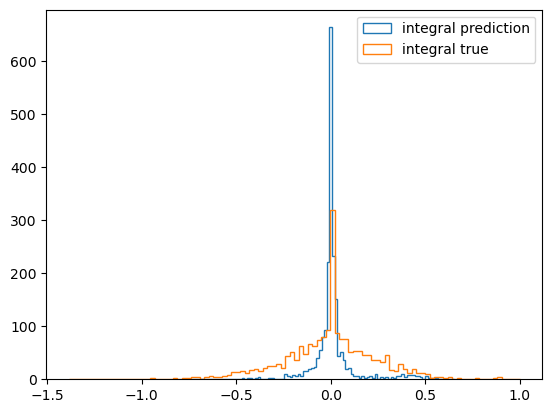

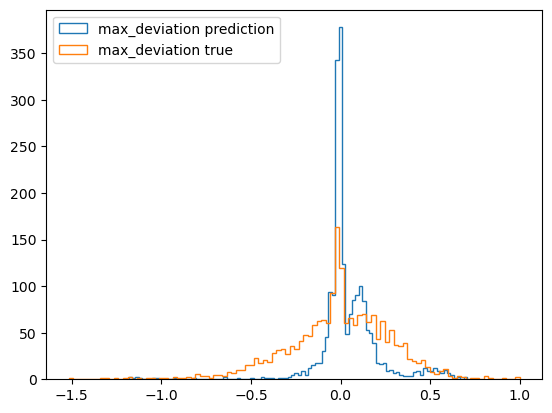

In [15]:
plt.figure()
plt.hist(pred_df['integral_R'], histtype='step', bins=100, label='integral prediction')
plt.hist(regressor_data['y_test']['integral_R'], histtype='step', bins=100, label='integral true')
plt.legend()
plt.show()

plt.figure()
plt.hist(pred_df['max_deviation'], histtype='step', bins=100, label='max_deviation prediction')
plt.hist(regressor_data['y_test']['max_deviation'], histtype='step', bins=100, label='max_deviation true')
plt.legend()
plt.show()